In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/pilot4.json'
#pilot3.json has 10 anagrams -- each subject sees three anagrams randomly -- possible confound of ordering effects
#pilot4.json has 15 anagrams -- each subject only sees 1 anagram randomly. 
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

390

In [3]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'CTA', 'BLEL', 'SROT', 'WROD', 'PITN', 'SONW', 'VLVOO', 'PONHE', 'PREOK', 'YJAKWLA', 'KHAOMCM', 'IORCNAG', 'DALRBEU', 'HNATUYG']
    idx = []
    idx.append(order.index(user_order))
    return idx

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

221 169


In [4]:
#get subject data for the 15 anagrams

time_guess = [[] for i in range(15)] 
actual_rt = [[] for i in range(15)]
give_up = [[] for i in range(15)]
aha = [[] for i in range(15)]

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    time_guess[idx[0]].append(entry_data[5]['response']) #5 is first time estimation
    
    counter = 6    
    rt = entry_data[6]['rt']
    attempt = entry_data[6]['responses'] 
    g = 0
    while anagrams_answers.lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up        
        if "next" in attempt.lower(): #break if person gave up            
            g = 1
            break
        else:                
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']  
            
    give_up[idx[0]].append(g) #did subject give up or not
    actual_rt[idx[0]].append(rt) #append actual time to complete

    counter = counter+1    
    r = entry_data[counter]['responses'] #aha rating
    aha[idx[0]].append(int(r[6]))


In [5]:
#data conversion, clean-up, and storage here
anagrams = ['the', 'cat', 'bell', 'sort', 'word', 'pint', 'snow', 'volvo', 'phone', 'poker', 'jaywalk', 'hammock', 'organic', 'durable', 'naughty']
mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
mean_tpe2 = []
mean_aha2 = []
for i in range(15): #go through all 15 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*30 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = time_guess_i-actual_rt_i
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    mean_tpe2.append(tpe_i/60) #this is for power analysis later on
    mean_aha2.append(aha_i)
    print('Anagram:', anagrams[i], 'Time guess:', np.mean(time_guess_i), 'Actual RT:',np.mean(actual_rt_i), 'TPE:', np.mean(tpe_i), 'AHA:',np.mean(aha_i), 'numSubs:', len(aha_i))
    
    


Anagram: the Time guess: 3.3333333333333335 Actual RT: 4.803222222222222 TPE: -1.4698888888888892 AHA: 3.0 numSubs: 9
Anagram: cat Time guess: 3.642857142857143 Actual RT: 8.208 TPE: -4.565142857142858 AHA: 2.7857142857142856 numSubs: 14
Anagram: bell Time guess: 20.625 Actual RT: 5.61525 TPE: 15.00975 AHA: 4.1875 numSubs: 16
Anagram: sort Time guess: 50.333333333333336 Actual RT: 27.43188888888889 TPE: 22.901444444444447 AHA: 2.7777777777777777 numSubs: 9
Anagram: word Time guess: 33.0 Actual RT: 6.039777777777778 TPE: 26.960222222222225 AHA: 3.9444444444444446 numSubs: 18
Anagram: pint Time guess: 24.0 Actual RT: 8.288714285714287 TPE: 15.711285714285713 AHA: 3.7142857142857144 numSubs: 7
Anagram: snow Time guess: 6.5 Actual RT: 5.8 TPE: 0.6999999999999998 AHA: 4.333333333333333 numSubs: 6
Anagram: volvo Time guess: 100.66666666666667 Actual RT: 14.387777777777778 TPE: 86.27888888888889 AHA: 4.444444444444445 numSubs: 9
Anagram: phone Time guess: 30.75 Actual RT: 6.927 TPE: 23.822999

[[1.         0.61062029]
 [0.61062029 1.        ]]
[[1.         0.38781903]
 [0.38781903 1.        ]]
[[1.         0.57209875]
 [0.57209875 1.        ]]
[[1.         0.93097406]
 [0.93097406 1.        ]]


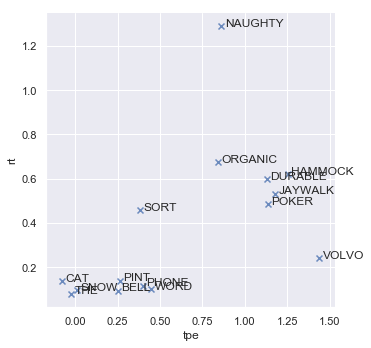

In [20]:
import seaborn as sns
import pandas as pd
sns.set(style="white", font_scale=1.25)
sns.set(color_codes=True)

df = pd.DataFrame({'anagrams': ['THE', 'CAT', 'BELL', 'SORT', 'WORD', 'PINT', 'SNOW', 'VOLVO', 'PHONE', 'POKER', 'JAYWALK', 'HAMMOCK', 'ORGANIC', 'DURABLE', 'NAUGHTY'],
    'tpe': mean_tpe,
    'aha': mean_aha,
    'estimate': mean_time_guess,
     'rt':  mean_rt})
#print(df)
#sns.lmplot('aha', 'tpe', data=df, fit_reg=False)
#label_point(df['aha'], df['tpe'], df['anagrams'] , plt.gca()) #function to label point in scatter plot

#sns.lmplot('aha', 'rt', data=df, fit_reg=False)
#label_point(df['aha'], df['rt'], df['anagrams'] , plt.gca()) #function to label point in scatter plot

sns_plot = sns.lmplot('tpe', 'rt', data=df, fit_reg=False,  markers="x")
label_point(df['tpe'], df['rt'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
sns_plot.savefig("output.png")
print(np.corrcoef(mean_tpe, mean_aha))
print(np.corrcoef(mean_rt, mean_aha))
print(np.corrcoef(mean_rt, mean_tpe))
print(np.corrcoef(mean_time_guess, mean_tpe))

In [7]:
#power analysis

n = 35

aha = []
tpe = []
means = []
for l in range(100):
    for i in range(len(mean_aha)):
        a = np.random.choice(mean_aha2[i],n)
        aha.append(np.mean(a))
        b = np.random.choice(mean_tpe2[i],n)
        tpe.append(np.mean(b))        
    c = np.corrcoef(aha, tpe)
    means.append(c[1][0])
        
print(np.mean(means))
print(np.std(means))    
    

0.5429095021964756
0.025580414827129857


In [8]:
#mediation analysis
from scipy import stats
import statsmodels.api as sm
import math

all_predictors = ['tpe', 'rt', 'estimate']
X = df[all_predictors]
y = df['aha']
X = sm.add_constant(X)

linear_model = sm.OLS(y, X)
results = linear_model.fit()
predictions = results.predict(X)
print(results.summary())

ImportError: cannot import name 'factorial'